<font color='lime'>EE 699 Next Generation Wireless Networks</font> 
- Assignment 02 
- Author: $\text{Rishabh Pomaje}$ 
- Contact: 210020036@iitdh.ac.in

- In this notebook, we will simulate the following queues and compare our empirical findings with the analytic results.
1. $M/M/1$
    - Poisson arrival process.
    - Exponential service times.
    - Single server.
    - Infinte buffer length.

In [76]:
# Dependencies :
import numpy as np
import matplotlib.pyplot as plt 
%config InlineBackend.figure_format='svg'
# Set global parameters for publication quality
plt.rcParams.update({
    "text.usetex": True,            # Comment if TeX is unavailable on your machine 
    "font.family": "serif",          
})
import seaborn as sns 
sns.set_theme('paper')

In [77]:
# Global Definitions :
del_t = 10 ** -3            # in some time units

1. **M/M/1**

In [78]:
def m_m_1_q(simTime, arrRate, depRate):
    """ 
    Function to simulate an M/M/1 queue.
    Just input 
    1. Time duration (in seconds) that you would like to simulate the queue for.
    2. The arrival rate (per unit time)
    3. The departure rate (per unit time)

    You will get as output 3 lists.
    1. The state of the queue at time t = 0, delT, 2delT, 3delT, and so on.
    2. The interarrival times.
    3. The departure times.    
    """ 
    # To store the inter-arrival and inter-departure times
    intArrTimes = []
    intDepTimes = [] 
    # Timers for arrival and departure
    arrTimer = 0 
    depTimer = 0 
    # Start with an empty queue
    num_runs = int(simTime / del_t)
    queue = np.zeros(num_runs) 
    for i in range(1, num_runs):
        # Flip a coin for arrival and departure 
        isArrival = np.random.binomial(1, min(1, arrRate * del_t))
        if queue[i-1] > 0:
            isDeparture = np.random.binomial(1, min(1, depRate * del_t))
        else:
            isDeparture = 0
        # Update the current state
        queue[i] = queue[i-1] + isArrival - isDeparture
        # Increment the timers for both arrival and departure
        arrTimer += del_t
        depTimer += del_t
        # If there was an arrival record the Inter-arrival time and clear the timer (restart)
        if isArrival:
            intArrTimes.append(arrTimer)
            arrTimer = 0
        # Similarly for departures
        if isDeparture:
            intDepTimes.append(depTimer)
            depTimer = 0 

    return [queue, intArrTimes, intDepTimes]

In [79]:
total_simul_time = 1000     # In common time units
arrival_rate = 5            # Number of arrival per second
departure_rate = 10         # Number of departure per second.
state, arrTimes, depTimes = m_m_1_q(total_simul_time, arrival_rate, departure_rate)

- Evolution of the state of the system

Text(0, 0.5, 'State of the system, $N(t)$')

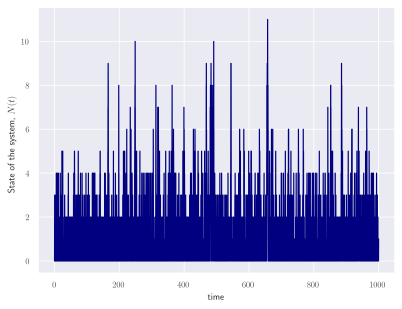

In [80]:
fig, axes = plt.subplots()
axes.plot(del_t * np.arange(int(total_simul_time / del_t)), state, color='navy')
axes.set_xlabel(f'time')
axes.set_ylabel(f'State of the system, $N(t)$')

- Distribution of Interarrival times

Text(0, 0.5, '$f_T(t)$')

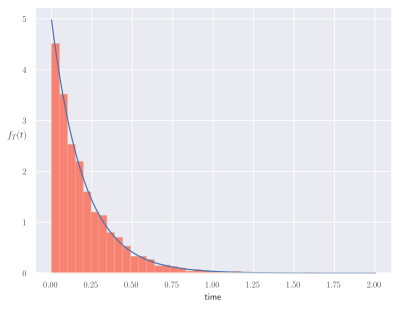

In [87]:
# Ideal PDF of Inter-arrival times :
t = np.linspace(min(arrTimes), max(arrTimes), 1000)
ideal_dist = arrival_rate * np.exp(-arrival_rate * t)

fig, axes = plt.subplots()
# Plot the ideal line
axes.plot(t, ideal_dist)
# Plot the empirical line
axes.hist(arrTimes, bins=41, density=True, linewidth=0.5, edgecolor='tan', color='salmon')
axes.set_xlabel(f'time')
axes.set_ylabel(f'$f_T(t)$', rotation=0)